In [1]:
from sqlalchemy import create_engine
import psycopg2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from postgres_credentials import postgres_str
#print(postgres_str)

In [2]:
# Create the connection 
engine = create_engine(postgres_str)
connection = engine.connect()

In [5]:
salary_by_title = pd.read_sql_query('''SELECT title, salary FROM employees_salaries;''', connection)
salary_by_title.head()

,title,salary
0,Staff,"$78,228.00"
1,Engineer,"$72,488.00"
2,Staff,"$42,365.00"
3,Senior Engineer,"$55,881.00"
4,Senior Engineer,"$41,538.00"


In [11]:
salary_by_title['title'].unique()

array(['Staff', 'Engineer', 'Senior Engineer', 'Senior Staff',
       'Technique Leader', 'Assistant Engineer', 'Manager'], dtype=object)

In [46]:
#salary_by_title['salary'] = pd.to_numeric(salary_by_title['salary'])
salary_by_title['salary'] = salary_by_title['salary'].replace('[\$,]', '', regex=True).astype(float)
salary_by_title.dtypes

title      object
salary    float64
dtype: object

In [65]:
max_sal = salary_by_title['salary'].max()
min_sal = salary_by_title['salary'].min()
print (max_sal, min_sal)

129492.0 40000.0


In [67]:
print(salary_by_title.shape)
salary_by_title.head()

(300024, 2)


,title,salary
0,Staff,78228.0
1,Engineer,72488.0
2,Staff,42365.0
3,Senior Engineer,55881.0
4,Senior Engineer,41538.0


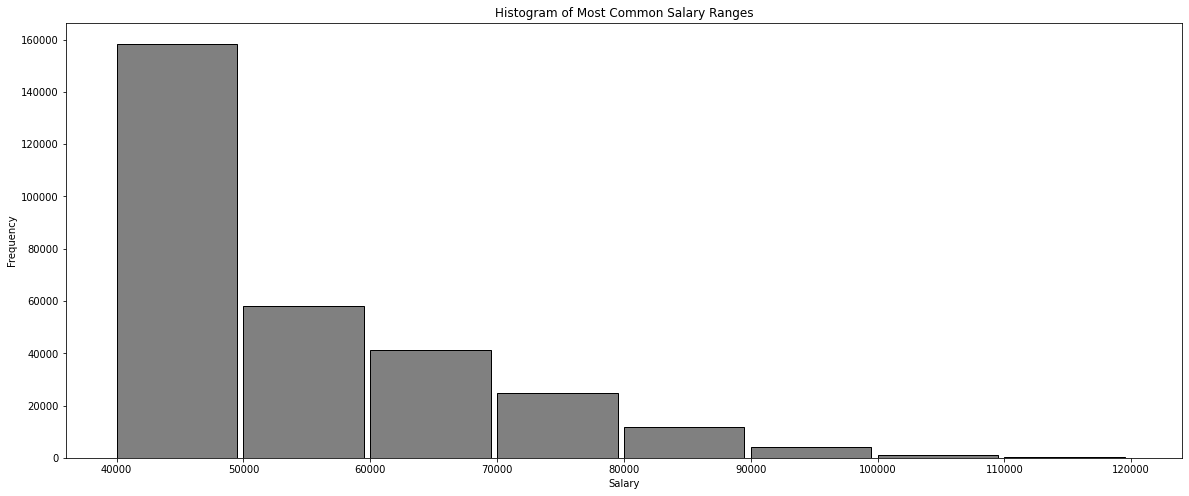

In [111]:
x = np.arange(40000, 130000, 10000)
#print(x)
plt.figure(figsize=[20,8])
n,bins,edges = plt.hist(salary_by_title.salary, x, color='#808080',edgecolor='k', width = 9500)
#hist = salary_by_title.hist(bins = 5, x)
plt.xticks(x)
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Histogram of Most Common Salary Ranges")
plt.show()

In [119]:
salary_by_title_grouped = salary_by_title.groupby('title')

freq_of_title = salary_by_title_grouped['title'].count()
#print(freq_of_title)
avg_of_title = salary_by_title_grouped['salary'].mean()
#print(avg_of_title)
new_df = pd.DataFrame({
                       "Frequency": freq_of_title,
                       "Avg Salary": avg_of_title
                      })
new_df

,Frequency,Avg Salary
title,,
Assistant Engineer,5835,48564.434447
Engineer,47303,48535.336511
Manager,24,51531.041667
Senior Engineer,97747,48506.799871
Senior Staff,26583,58550.172704
Staff,107384,58465.382850
Technique Leader,15148,48582.896092


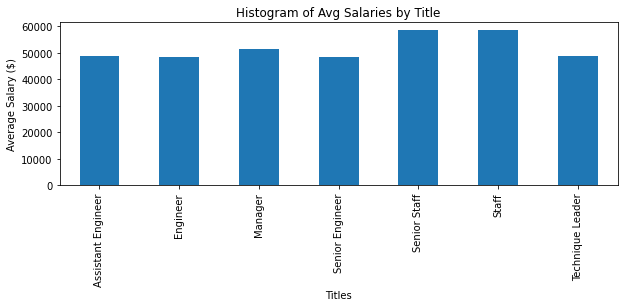

In [144]:
new_df['Avg Salary'].plot(kind='bar', figsize=(10,3))
plt.xlabel('Titles')
plt.ylabel('Average Salary ($)')
plt.title("Histogram of Avg Salaries by Title") 
plt.show()

In [151]:
employee_lookup = pd.read_sql_query('''SELECT * FROM employees_salaries WHERE emp_no = '499942';''', connection)
employee_lookup.head()

,emp_no,last_name,first_name,sex,salary,title
0,499942,Foolsday,April,F,"$40,000.00",Technique Leader


In [157]:
id = employee_lookup.emp_no[0]
first_name = employee_lookup.first_name[0]
last_name = employee_lookup.last_name[0]
#print(id, first_name, last_name)

In [158]:
print(f'I am employee ID:{id} and my name is {first_name} {last_name}.')

I am employee ID:499942 and my name is April Foolsday.
